<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/%20objectdetetion_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
# 下載模型，並解壓縮
def download_model(model_name, model_date):
    base_url = 'http://download.tensorflow.org/models/object_detection/tf2/'
    model_file = model_name + '.tar.gz'
    # 解壓縮
    model_dir = tf.keras.utils.get_file(fname=model_name,
                                        origin=base_url + model_date + '/' + model_file,
                                        untar=True)
    return str(model_dir)

MODEL_DATE = '20200711'
MODEL_NAME = 'centernet_hg104_1024x1024_coco17_tpu-32'
PATH_TO_MODEL_DIR = download_model(MODEL_NAME, MODEL_DATE)
PATH_TO_MODEL_DIR

1426472960/1426460092 [==============================] - 7s 0us/step


'/root/.keras/datasets/centernet_hg104_1024x1024_coco17_tpu-32'

In [14]:
def download_labels(filename):
    base_url = 'https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/data/'
    label_dir = tf.keras.utils.get_file(fname=filename,
                                        origin=base_url + filename,
                                        untar=False)
   # label_dir = pathlib.Path(label_dir)
    return str(label_dir)

LABEL_FILENAME = 'mscoco_label_map.pbtxt'
PATH_TO_LABELS = download_labels(LABEL_FILENAME)
PATH_TO_LABELS

'/root/.keras/datasets/mscoco_label_map.pbtxt'

In [11]:
!pip install object_detection.utils import label_map_util
!pip install object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('載入模型...', end='')
start_time = time.time()

# 載入模型。
detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print(f'共花費 {elapsed_time} 秒.')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement object_detection.utils (from versions: none)
ERROR: No matching distribution found for object_detection.utils
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement object_detection.utils (from versions: none)
ERROR: No matching distribution found for object_detection.utils
載入模型...

共花費 62.769039154052734 秒.


In [15]:
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)

NameError: ignored

In [18]:
# 選一張圖片(./images_2/image2.jpg)物件偵測
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 不顯示警告訊息
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

# 開啟一張圖片
image_np = np.array(Image.open('/content/09.png'))

# 轉為 TensorFlow tensor 資料型態
input_tensor = tf.convert_to_tensor(image_np)
# 加一維，變為 (筆數, 寬, 高, 顏色)
input_tensor = input_tensor[tf.newaxis, ...]
# 這方法也可以
# input_tensor = np.expand_dims(image_np, 0)

detections = detect_fn(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))

# detections：物件資訊 內含 (候選框, 類別, 機率)
print(f'物件個數：{num_detections}')
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}

detections['num_detections'] = num_detections
# 轉為整數
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

print(f'物件資訊 (候選框, 類別, 機率)：')
for detection_boxes, detection_classes, detection_scores in \
    zip(detections['detection_boxes'], detections['detection_classes'], detections['detection_scores']):
    print(np.around(detection_boxes,4), detection_classes, round(detection_scores*100, 2))

ValueError: ignored

In [19]:
# min_score_thresh=.30 表機率(Confidence)至少要大於 30%
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes']+1,
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.30,
      agnostic_mode=False)

plt.figure(figsize=(12,8))
plt.imshow(image_np_with_detections, cmap='viridis')
plt.show()

NameError: ignored

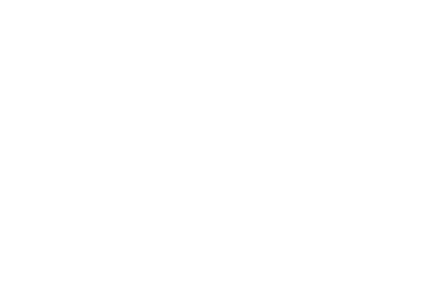

<Figure size 432x288 with 0 Axes>

In [23]:
 
 plt.savefig('/content/09.png')
# plt.show()
from IPython.display import Image
Image('/content/09.png')